## Metal Furnace Challenge : Weekend

**Manufacturing of any alloy is not a simple process. Many complicated factors are involved in the making of a perfect alloy, from the temperature at which various metals are melted to the presence of impurities to the cooling temperature set to cool down the alloy. Very minor changes in any of these factors can affect the quality or grade of the alloy produced.**

<img src="https://www.machinehack.com/wp-content/uploads/2020/04/MetalFurnace-01-1536x864.jpg" width=800 height=500>

Given are 28 distinguishing factors in the manufacturing of an alloy, your objective as a data scientist is to build a Machine Learning model that can predict the grade of the product using these factors.

You are provided with 28 anonymized factors (f0 to f27) that influence the making of a perfect alloy that is to be used for various applications based on the grade/quality of the obtained product.

**Data Description**  
The unzipped folder will have the following files.

- Train.csv – 620 observations.
- Test.csv – 266 observations.
- Sample Submission – Sample format for the submission.
- Target Variable: grade

# Import Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#Print all rows and columns. Dont hide any
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter('ignore')

from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.metrics import log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

import xgboost as xgb
import lightgbm as lgb

## Import Dataset

## PART 1

In [3]:
train = pd.read_csv("data/Train.csv")
test = pd.read_csv("data/Test.csv")
sample = pd.read_excel("data/Sample_Submission.xlsx")

In [4]:
train.shape,test.shape

((620, 29), (266, 28))

In [5]:
train.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,grade
0,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,0.395874,0.308879,0.548623,0.472101,0.172917,0.098853,0.308879,0.040193,0.182574,0.085505,0.233285,-1.080663,0.443257,-0.406121,-0.687687,0.271886,3.727218,0.102129,2
1,-0.825098,-0.26425,3.032397,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,0.0,0.395874,0.308879,0.548623,0.472101,0.172917,0.098853,0.308879,0.040193,0.182574,0.085505,0.233285,-1.080663,-0.232546,-0.406366,-0.687687,0.271886,-0.232472,0.102129,4
2,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,0.395874,0.308879,0.548623,0.472101,0.172917,0.098853,0.308879,0.040193,0.182574,0.085505,0.233285,0.925358,1.459782,1.221876,1.877777,0.271886,-0.232472,0.102129,2
3,0.511733,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,0.395874,0.308879,-1.999287,-2.118189,0.172917,0.098853,-3.237512,0.040193,0.182574,0.085505,0.233285,0.925358,-0.008030,-0.406366,1.504523,0.271886,-0.232472,0.102129,2
4,-0.825098,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,-2.526055,0.308879,-1.999287,-2.118189,0.172917,0.098853,0.308879,0.040193,0.182574,0.085505,0.233285,0.925358,-0.573268,-1.164793,1.877777,0.271886,-0.232472,0.102129,2


In [6]:
test.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27
0,-0.837812,-0.273636,1.276580,0.463262,-0.585142,-0.24287,0.349804,0.12356,0.166795,0.06143,0.445195,0.27735,-2.139737,-2.527625,0.17609,0.06143,0.285133,0.06143,0.197642,0.06143,0.27735,0.886135,-0.568935,1.100428,-0.244589,0.229718,-0.217109,0.087039
1,2.078087,-0.273636,-0.496119,0.463262,-2.438092,-0.24287,0.349804,0.12356,0.166795,0.06143,0.445195,0.27735,0.513736,0.395628,0.17609,0.06143,0.285133,0.06143,-5.059644,0.06143,0.27735,0.886135,0.504299,-0.434268,-0.244040,0.229718,-0.217109,0.087039
2,-0.837812,-0.273636,1.276580,0.463262,-0.585142,-0.24287,0.349804,0.12356,0.166795,0.06143,0.445195,0.27735,0.513736,0.395628,0.17609,0.06143,0.285133,0.06143,0.197642,0.06143,0.27735,-1.128496,-0.568935,-0.434268,-0.662763,0.229718,-0.217109,0.087039
3,-0.837812,-0.273636,-0.496119,0.463262,1.267808,-0.24287,-2.858743,0.12356,0.166795,0.06143,0.445195,0.27735,0.513736,0.395628,0.17609,0.06143,0.285133,0.06143,-5.059644,0.06143,0.27735,-1.128496,-0.449819,-1.918647,-0.662763,0.229718,-0.217109,0.087039
4,-0.837812,-0.273636,-0.496119,0.463262,-0.585142,-0.24287,-2.858743,0.12356,0.166795,0.06143,0.445195,0.27735,0.513736,0.395628,0.17609,0.06143,0.285133,0.06143,0.197642,0.06143,0.27735,-1.128496,-0.568935,-0.434268,-0.662763,0.229718,-0.217109,0.087039


In [7]:
train.grade.value_counts()

2    472
1     68
3     47
4     27
0      6
Name: grade, dtype: int64

In [8]:
train.nunique()

f0        8
f1       10
f2        7
f3        2
f4        3
f5        8
f6        2
f7        2
f8        3
f9        1
f10       2
f11       2
f12       3
f13       2
f14       2
f15       2
f16       2
f17       2
f18       2
f19       4
f20       2
f21       2
f22      49
f23      63
f24      24
f25       3
f26       3
f27       3
grade     5
dtype: int64

In [9]:
test.nunique()

f0      8
f1      7
f2      6
f3      2
f4      3
f5      6
f6      2
f7      2
f8      3
f9      2
f10     2
f11     2
f12     3
f13     2
f14     2
f15     2
f16     2
f17     2
f18     2
f19     2
f20     2
f21     2
f22    37
f23    41
f24    14
f25     3
f26     3
f27     2
dtype: int64

## Metric

<img src="https://www.machinehack.com/wp-content/uploads/2020/02/MULTI_CLASS_LOGLOSS_FORM.png" height=400>

In [10]:
def metric(y,y0):
    return log_loss(y,y0)

## Features

**Removing the f9 feature as the train data contains only 1 unique value and f9 feature did not have feature importance**

In [11]:
features = list(set(train.columns)-set(['grade','f9']))
target = 'grade'
len(features)

27

# Cross Validation

**Since, the test data was only 30% on public leaderboard, it was diffcuilt to match the local validation score**

In [12]:
def cross_valid(model,train,features,target,cv=3):
    results = cross_val_predict(model, train[features], train[target], method="predict_proba",cv=cv)
    return metric(train[target],results)

**Baseliner Models are checked to find good performing basliner models**

In [13]:
models = [lgb.LGBMClassifier(), xgb.XGBClassifier(), GradientBoostingClassifier(), LogisticRegression(), 
              RandomForestClassifier(), AdaBoostClassifier()
             ]

for i in models:
    model = i
    error = cross_valid(model,train,features,target,cv=10)
    print(str(model).split("(")[0], error)

LGBMClassifier 0.1614617219167179
XGBClassifier 0.15135431579699563
GradientBoostingClassifier 0.19288880185032714
LogisticRegression 0.36364542223702856
RandomForestClassifier 0.1988283464155193
AdaBoostClassifier 1.3349991672743202


# Modelling XGB Model

In [14]:
def xgb_model(train, features, target, plot=True):
    evals_result = {}
    trainX, validX, trainY, validY = train_test_split(train[features], train[target], test_size=0.2, random_state=13)
    print("XGB Model")
    
    dtrain = xgb.DMatrix(trainX, label=trainY)
    dvalid = xgb.DMatrix(validX, label=validY)
    watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
    
    MAX_ROUNDS=2000
    early_stopping_rounds=100
    params = {
        'booster': 'gbtree',
        'objective': 'multi:softprob',
        'eval_metric': 'mlogloss',
        'learning_rate': 0.01,
        'num_round': MAX_ROUNDS,
        'max_depth': 8,
        'seed': 25,
        'nthread': -1,
        'num_class':5
    }
    
    model = xgb.train(
        params,
        dtrain,
        evals=watchlist,
        num_boost_round=MAX_ROUNDS,
        early_stopping_rounds=early_stopping_rounds,
        verbose_eval=50
        #feval=metric_xgb
    
    )
    
    print("Best Iteration :: {} \n".format(model.best_iteration))
    
    
    if plot:
        # Plotting Importances
        fig, ax = plt.subplots(figsize=(24, 24))
        xgb.plot_importance(model, height=0.4, ax=ax)

XGB Model
[01:16:56] WARNING: /workspace/src/learner.cc:328: 
Parameters: { num_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-mlogloss:1.58837	valid-mlogloss:1.58974
Multiple eval metrics have been passed: 'valid-mlogloss' will be used for early stopping.

Will train until valid-mlogloss hasn't improved in 100 rounds.
[50]	train-mlogloss:0.91360	valid-mlogloss:0.95750
[100]	train-mlogloss:0.58307	valid-mlogloss:0.65255
[150]	train-mlogloss:0.39094	valid-mlogloss:0.48186
[200]	train-mlogloss:0.27371	valid-mlogloss:0.37873
[250]	train-mlogloss:0.20020	valid-mlogloss:0.31611
[300]	train-mlogloss:0.15344	valid-mlogloss:0.27949
[350]	train-mlogloss:0.12128	valid-mlogloss:0.26036
[400]	train-mlogloss:0.09965	valid-mlogloss:0.24850
[450]	train-mlogloss:0.08434	valid

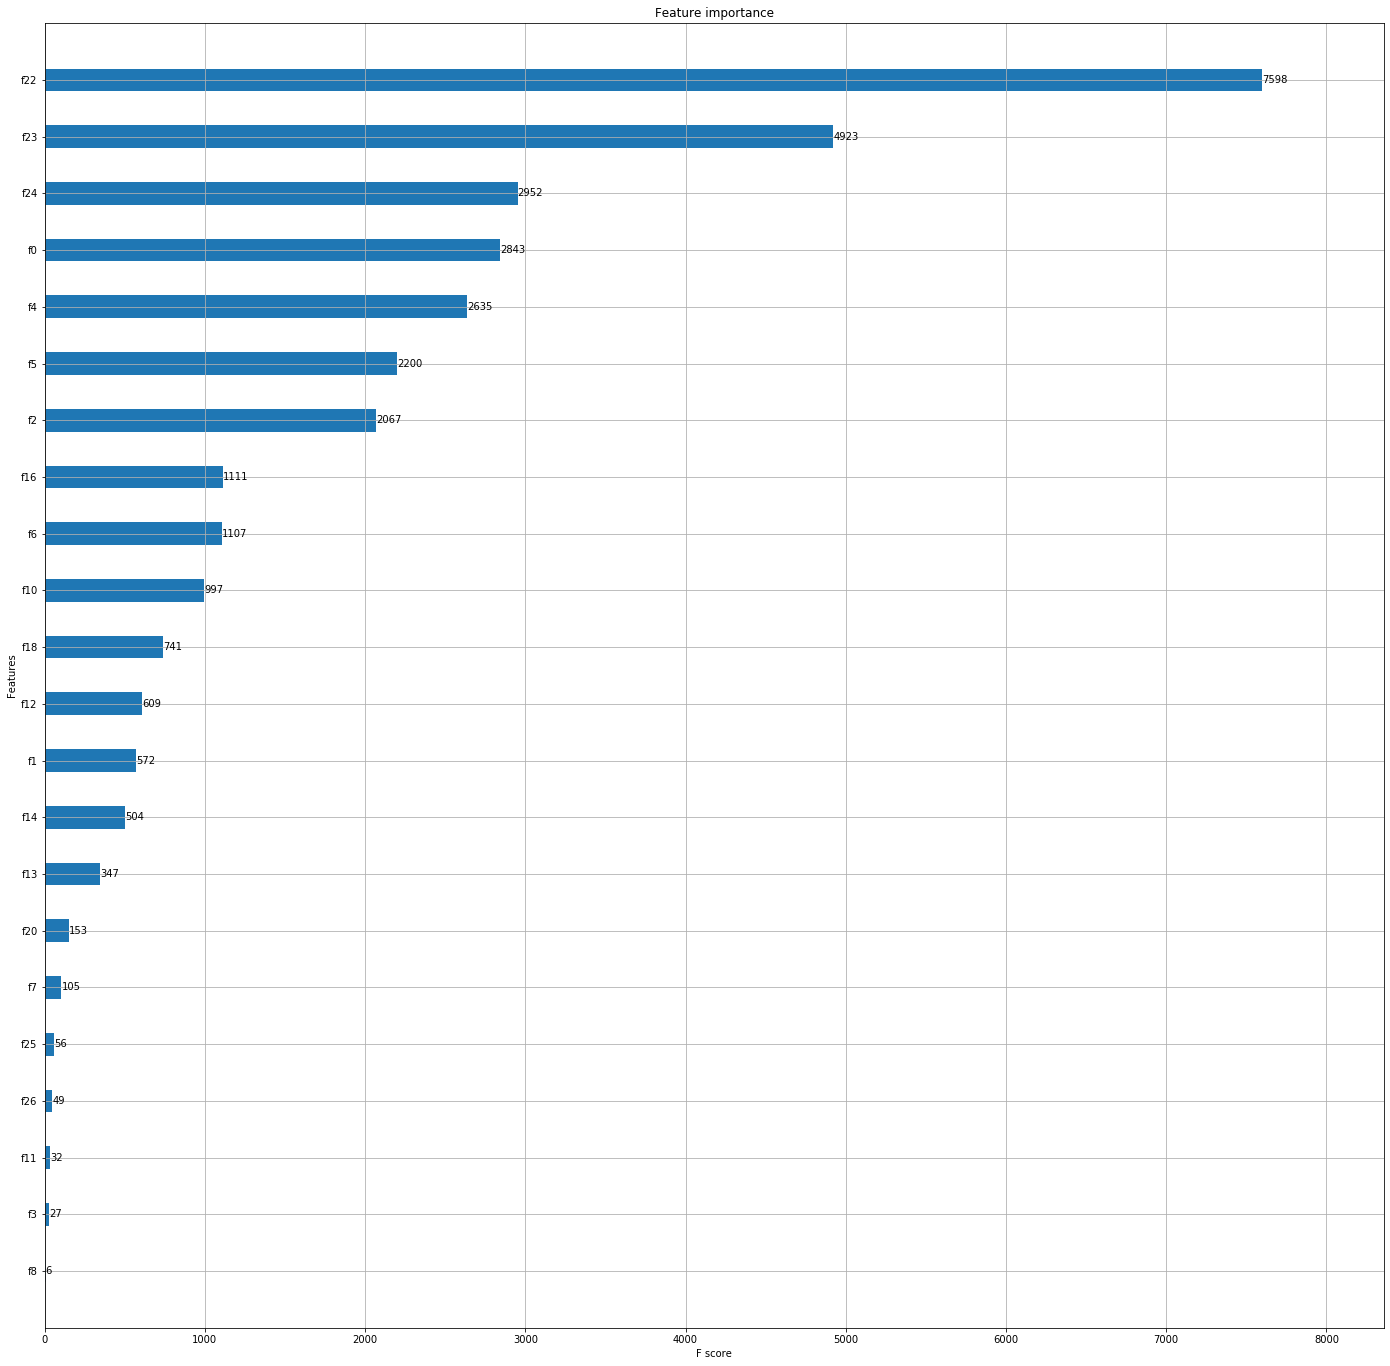

In [15]:
xgb_model(train, features, target, plot=True)

In [16]:
xgb1 = xgb.XGBClassifier(
    booster='gbtree',
    objective='multi:softprob',
    learning_rate= 0.1,
    num_round= 775,
    max_depth=8,
    seed=25,
    nthread=-1,
    eval_metric='mlogloss',
    num_class=5

)

## Train and Validation data splits

In [17]:
trainX, validX, trainY, validY = train_test_split(train[features], 
                                                  train[target], test_size=0.2,stratify=train[target], random_state=13)

In [18]:
model = xgb1
cross_valid(model,train,features,target,cv=10)

0.1450790688486567

# Prediction on test dataset

In [19]:
model = xgb1
model.fit(trainX[features],trainY)
y_pred_valid = model.predict_proba(validX[features])
print("Validation Score:",metric(validY,y_pred_valid))
y_pred_test = model.predict_proba(test[features])
result = pd.DataFrame(y_pred_test)
#result.to_excel("xgb_boost_solution1.xlsx",index=False)

Validation Score: 0.14190392327990622


In [20]:
result.head()

,0,1,2,3,4
0,0.000374,0.000774,0.998009,0.000383,0.000461
1,0.000420,0.077199,0.003564,0.918483,0.000334
2,0.000319,0.000330,0.998785,0.000262,0.000304
3,0.001292,0.001324,0.022292,0.973273,0.001819
4,0.000533,0.000553,0.990465,0.007940,0.000509


In [21]:
## Public score
## 0.16467

## PART-2

**Mapping test features values to train feature values**

In [22]:
test.head(2)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27
0,-0.837812,-0.273636,1.276580,0.463262,-0.585142,-0.24287,0.349804,0.12356,0.166795,0.06143,0.445195,0.27735,-2.139737,-2.527625,0.17609,0.06143,0.285133,0.06143,0.197642,0.06143,0.27735,0.886135,-0.568935,1.100428,-0.244589,0.229718,-0.217109,0.087039
1,2.078087,-0.273636,-0.496119,0.463262,-2.438092,-0.24287,0.349804,0.12356,0.166795,0.06143,0.445195,0.27735,0.513736,0.395628,0.17609,0.06143,0.285133,0.06143,-5.059644,0.06143,0.27735,0.886135,0.504299,-0.434268,-0.244040,0.229718,-0.217109,0.087039


**Trick Part** 

In [23]:
tr_f0 = pd.DataFrame(train['f0'].unique()).sort_values(by=0).reset_index(drop=True)
te_f0 = pd.DataFrame(test['f0'].unique()).sort_values(by=0).reset_index(drop=True)
d = pd.concat([tr_f0,te_f0],axis=1)

In [24]:
d

,0,0
0,-0.825098,-0.837812
1,-0.379487,-0.421255
2,0.066123,-0.004698
3,0.511733,0.411859
4,0.957343,0.828416
5,1.402954,1.244973
6,1.848564,1.661530
7,2.294174,2.078087


**On observation, we can see there is some relation between train and test unique values.  
The relation is found using the below equation:  
y = ax + c**  

**train_value = a1*test_value + c1**

In [25]:
# Function to find the a1 and c1 values for each feature.
def calculate_transform(i,train,test):
    tr = pd.DataFrame(train[i].unique()).sort_values(by=0).reset_index(drop=True)
    te = pd.DataFrame(test[i].unique()).sort_values(by=0).reset_index(drop=True)

    a1 = (tr[0][1]-tr[0][0])/(te[0][1]-te[0][0])
    c1 = (tr[0][0]) - (te[0][0])*a1
    #a1*te[0] + c1
    return [a1,c1]

In [26]:
for i in list(set(features)-set(['f1','f22','f23'])):
    l = calculate_transform(i,train,test)
    test[i] = l[0]*test[i]+l[1]

**f23,f1,f22 features have unequal number of unique values so they r calculated separetely**

In [27]:
#f1
tr_f0 = pd.DataFrame(train['f1'].unique()).sort_values(by=0).reset_index(drop=True)
te_f0 = pd.DataFrame(test['f1'].unique()).sort_values(by=0).reset_index(drop=True)
a1 = (tr_f0[0][9]-tr_f0[0][8])/(te_f0[0][6]-te_f0[0][5])
c1 = (tr_f0[0][8]) - (te_f0[0][5])*a1
test['f1'] = a1*test['f1'] + c1

#f22
tr_f0 = pd.DataFrame(train['f22'].unique()).sort_values(by=0).reset_index(drop=True)
te_f0 = pd.DataFrame(test['f22'].unique()).sort_values(by=0).reset_index(drop=True)
a1 = (tr_f0[0][48]-tr_f0[0][47])/(te_f0[0][36]-te_f0[0][35])
c1 = (tr_f0[0][47]) - (te_f0[0][35])*a1
test['f22'] = a1*test['f22'] + c1


#f23
tr_f0 = pd.DataFrame(train['f23'].unique()).sort_values(by=0).reset_index(drop=True)
te_f0 = pd.DataFrame(test['f23'].unique()).sort_values(by=0).reset_index(drop=True)
a1 = (tr_f0[0][62]-tr_f0[0][61])/(te_f0[0][40]-te_f0[0][39])
c1 = (tr_f0[0][61]) - (te_f0[0][39])*a1
test['f23'] = a1*test['f23'] + c1

In [28]:
test.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27
0,-0.825098,-0.26425,1.388246,0.4094,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.06143,0.395874,0.308879,-1.999287,-2.118189,0.172917,0.098853,0.308879,0.040193,0.182574,-8.750026,0.233285,0.925358,-0.573268,1.087230,-0.287622,0.271886,-0.232472,-7.812837
1,2.294174,-0.26425,-0.461423,0.4094,-2.356907,-0.276144,0.370965,0.090167,0.107958,0.06143,0.395874,0.308879,0.548623,0.472101,0.172917,0.098853,0.308879,0.040193,-5.477226,-8.750026,0.233285,0.925358,0.443257,-0.406121,-0.287096,0.271886,-0.232472,-7.812837
2,-0.825098,-0.26425,1.388246,0.4094,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.06143,0.395874,0.308879,0.548623,0.472101,0.172917,0.098853,0.308879,0.040193,0.182574,-8.750026,0.233285,-1.080663,-0.573268,-0.406121,-0.687687,0.271886,-0.232472,-7.812837
3,-0.825098,-0.26425,-0.461423,0.4094,1.305455,-0.276144,-2.695676,0.090167,0.107958,0.06143,0.395874,0.308879,0.548623,0.472101,0.172917,0.098853,0.308879,0.040193,-5.477226,-8.750026,0.233285,-1.080663,-0.460446,-1.850510,-0.687687,0.271886,-0.232472,-7.812837
4,-0.825098,-0.26425,-0.461423,0.4094,-0.525726,-0.276144,-2.695676,0.090167,0.107958,0.06143,0.395874,0.308879,0.548623,0.472101,0.172917,0.098853,0.308879,0.040193,0.182574,-8.750026,0.233285,-1.080663,-0.573268,-0.406121,-0.687687,0.271886,-0.232472,-7.812837


In [29]:
#xgb_model(train,features,target,plot=False)

In [30]:
xgb1 = xgb.XGBClassifier(
    booster='gbtree',
    objective='multi:softprob',
    learning_rate= 0.1,
    num_round= 775,
    max_depth=8,
    seed=25,
    nthread=-1,
    eval_metric='mlogloss',
    num_class=5
)

In [31]:
model = xgb1
cross_valid(model,train,features,target,cv=10)

0.1450790688486567

In [32]:
trainX, validX, trainY, validY = train_test_split(train[features], 
                                                  train[target], test_size=0.2,stratify=train[target], random_state=13)

In [33]:
model = xgb1
model.fit(trainX,trainY)
y_pred_valid = model.predict_proba(validX)
print("Validation Score:",metric(validY,y_pred_valid))
y_pred_test = model.predict_proba(test[features])
result = pd.DataFrame(y_pred_test)
#result.to_excel("xgb_boost_trick_part.xlsx",index=False)
##0.08903

Validation Score: 0.14190392327990622


In [34]:
result.head()

,0,1,2,3,4
0,0.000316,0.000517,0.998454,0.000324,0.000390
1,0.000443,0.012755,0.003776,0.982674,0.000352
2,0.000309,0.000348,0.998826,0.000219,0.000298
3,0.001354,0.001308,0.034240,0.961424,0.001674
4,0.000493,0.000555,0.995900,0.002577,0.000475


In [35]:
# This is the final submission which got highest private score and 0.08903 public score
#result.to_excel("xgb_boost_trick_part.xlsx",index=False)